In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

# EDA

In [85]:
data=pd.read_csv("Customer Purchasing Behaviors.csv")
data.head(5)

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [86]:
data=data.drop(["user_id"],axis=1)

In [87]:
data.head(5)

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,North,12
1,34,55000,350,7.0,South,18
2,45,65000,500,8.0,West,22
3,22,30000,150,3.0,East,10
4,29,47000,220,4.8,North,13


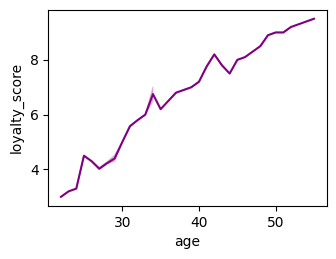

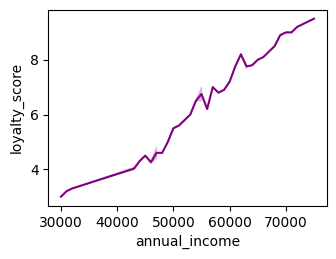

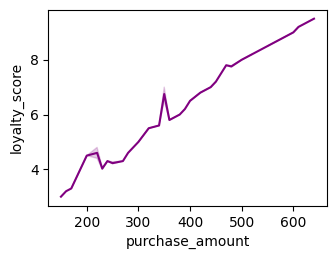

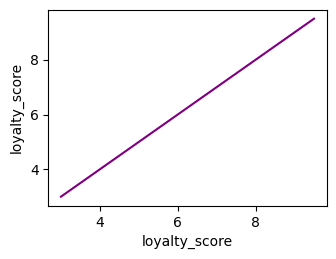

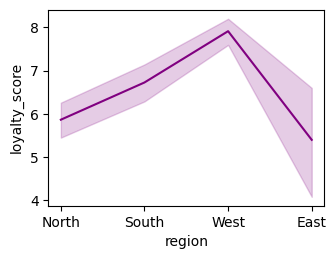

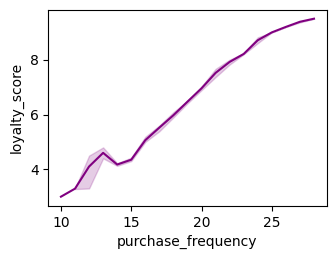

In [88]:
for column in data.columns:
    plt.subplot(2,2,2)
    sns.lineplot(x=column,y="loyalty_score",data=data,color="purple")
    plt.tight_layout()
    plt.show()

<Axes: xlabel='region', ylabel='loyalty_score'>

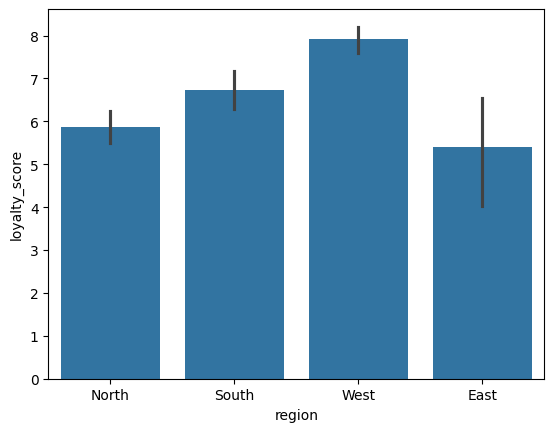

In [89]:
sns.barplot(x="region",y="loyalty_score",data=data)

<Axes: >

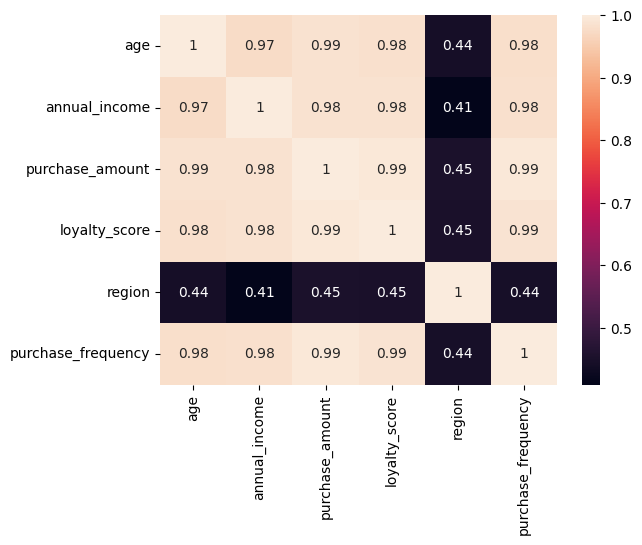

In [100]:
sns.heatmap(data.corr(),annot=True)

In [101]:
le=LabelEncoder()

In [102]:
data["region"]=le.fit_transform(data["region"])

In [103]:
data.head(5)

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,1,12
1,34,55000,350,7.0,2,18
2,45,65000,500,8.0,3,22
3,22,30000,150,3.0,0,10
4,29,47000,220,4.8,1,13


# Model : Linear Regression

In [104]:
lr=LinearRegression()

In [105]:
x=data.drop(["loyalty_score"],axis=1)
y=data["loyalty_score"]

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
lr.fit(x_train,y_train)

LinearRegression()

In [108]:
y_pred=lr.predict(x_test)

In [109]:
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [99]:
print("R2 Score :",r2*100)
print("Mean Sqaured Error :",mse*100)

R2 Score : 99.1098466593405
Mean Sqaured Error : 3.679285020674852


# Model : Random Forest Regression

In [110]:
rfr=RandomForestRegressor(n_estimators=10, random_state=42)

In [111]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [112]:
y_predi=rfr.predict(x_test)

In [113]:
r22=r2_score(y_test,y_predi)
mse1=mean_squared_error(y_test,y_predi)

In [114]:
print("R2 Score :",r22*100)
print("Mean Squared Error :",mse1*100)

R2 Score : 99.94334653623376
Mean Squared Error : 0.23416666666666633
